In [1]:
from LDR import load_data, affinity_matrix
import graphlearning as gl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from utils1 import neon_tab10_cmap, repulsive_force_A_with_subsample_singular_without_renorm

In [2]:
X,y = load_data('mnist_784')

In [3]:
import time
start_time = time.time()
P_matrix = affinity_matrix(X, 150, 8, 200)
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")
# takes about 4 minutes. once optimized, should be closer to 20+20+34 seconds
# 20*2 because we have to run knn 2x 34 for eigendecomp
# my binary search are implimented naively right now and are eating the extra time
# need to parrelelize things and study the tsne.joint_probabilities implimentation

Time taken: 249.9532790184021 seconds


In [4]:
P = gl.graph(P_matrix)
vals, vecs = P.eigen_decomp(k = 200)
# another eigendecomp costs 34

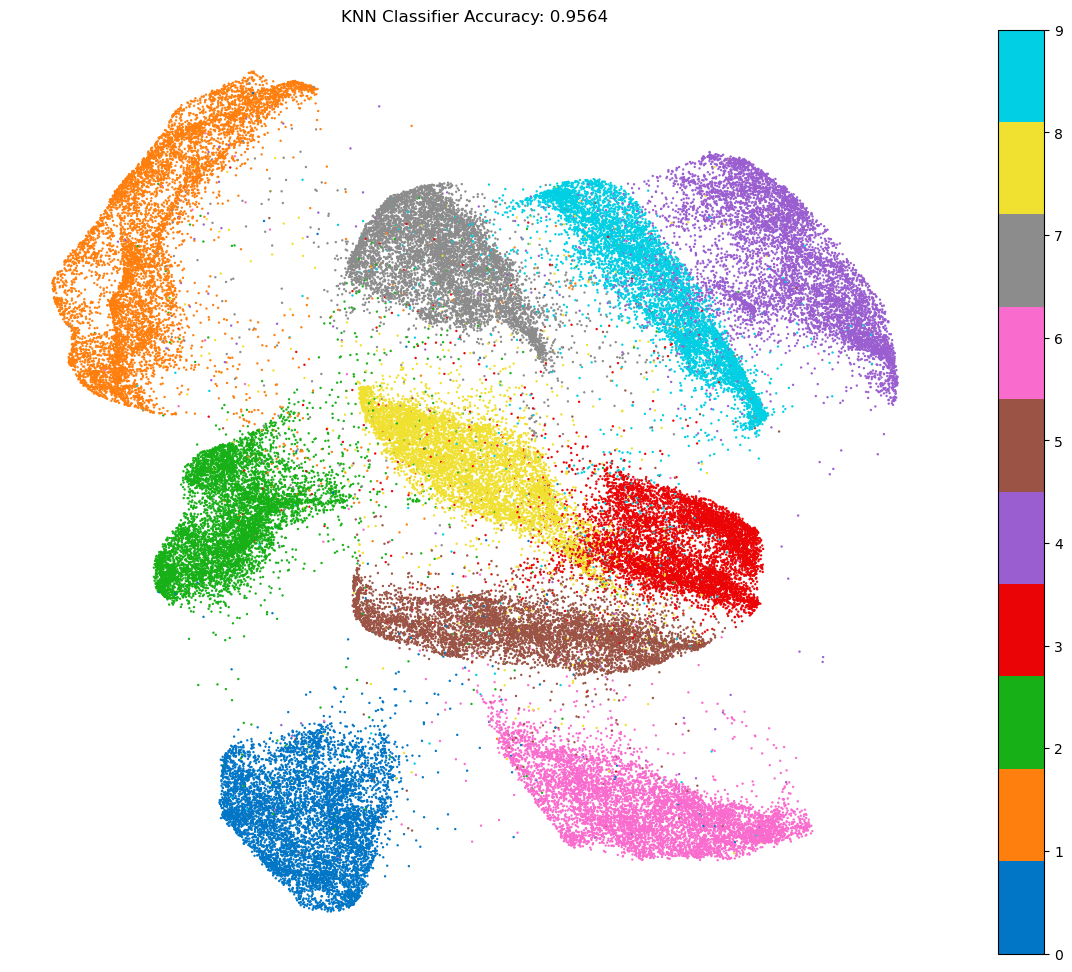

In [6]:
A = np.zeros((200,2))
A[0,0] = 1
A[1,1] = 1
h = 0.1
l = 200

for i in range(1000):
    current_h = h if i < 500 else h / 8
    A -= 7.5 * current_h * np.diag(vals) @ A + current_h * repulsive_force_A_with_subsample_singular_without_renorm(A, 70000, l, vecs, P_matrix, 1)

Y = vecs @ A

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(Y, y)


y_pred = knn.predict(Y)
accuracy = accuracy_score(y, y_pred)


plt.figure(figsize=(15, 12))
plt.title(f"KNN Classifier Accuracy: {accuracy:.4f}")
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=neon_tab10_cmap, s=0.5)
plt.colorbar()
plt.axis('off')
plt.show()